# KAN med service access data
Idee hentet fra https://github.com/team-daniel/KAN/blob/master/KAN_classification.ipynb


In [287]:
# Refresh dependencies
#!pip install -r ../requirements.txt

In [288]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('service_access_data/Generated_Access_Log_Dataset.csv')
df.head()

,username,geography,weekday,servicename,classification
0,Nils,Hvaler,Saturday,userprofile,ok
1,Ola,Oslo,Saturday,login,ok
2,Nils,Hvaler,Monday,login,ok
3,Nina,Bergen,Friday,userprofile,ok
4,Nina,Trondhjem,Tuesday,order,ok


In [289]:
from sklearn.datasets import load_iris
iris = load_iris()

# Beskrivelse av datasettet
Dette er en tilgangslogg til tjenester i en butikk.
Dette skal klassifisere forsøk på tjenestetilgang i tre klasser:
 * ok
 * error
 * suspicious

Innput er 4 parametre:
 * username
 * geography
 * weekday
 * servicename

Servicenames:
 * login
 * userprofile
 * userreview
 * order

Geography er en forenkling av lokasjon til IP-adresse:
 * Hvaler
 * Bergen
 * Trondhjem
 * Oslo
 * Fredrikstad

Usernames:
 * Nils, reiser mye, og kjøper mye. Legger aldri inn userreview
 * Ola, kjøper litt. Bruker butikken kun fra Oslo og Hvaler. Legger kun inn userreview på søndager, fra Oslo
 * Per, kan finne på å missbruke Nils og Ola sine logins. Bruker butikken kun fra Bergen
 * Hilde, bruker butikken fra Fredrikstad, Oslo og Hvaler. Random bruk av tjenester og dager.
 * Nina, bruker butikken fra Bergen og Trondhjem. Random bruk av tjenester og dager.

## login.target_names
Oversikt over det tre blomstertypene i datasettet. Kalles klasser, og oversettes til 0, 1 eller 2 i iris.target
np.ndarray(['ok', 'failed', 'suspicious'], dtype='<U10')

## login.target
Hver rad er en , og kolonnen er hvilken klasse login tilhører. 0, 1 eller 2

## iris.feature_names
Beskriver hva de fire kolonnene i iris.data er. ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

## iris.data
Hver rad er en blomst, og kolonnene er sepal length, sepal width, petal length og petal width.
150x4 numpy.ndarray.

In [290]:
print("Classifications: ",df['classification'].unique())
feature_names = ['username', 'geography', 'weekday', 'servicename']
# Konvertere kategoriske variabler til numeriske
label_encoders = {}
for column in feature_names:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
print(label_encoders['username'].inverse_transform([1]))

# Konvertere classification
lec = LabelEncoder()
df['classification'] = lec.fit_transform(df['classification'])
label_encoders['classification'] = lec
# print(label_encoders['classification'].inverse_transform([0]))
target_names = list()
for i in range(len(lec.classes_)):
    class_name = lec.inverse_transform([i])[0]
    target_names.append(class_name)
target_names = np.array(target_names)
print("LabelEncoded classification order: ",target_names)

# Definere input og output
X = df[feature_names]
y = df['classification']

# Splitte data i trenings- og testsett
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Classifications:  ['ok' 'suspicious' 'error']
['Nils']
LabelEncoded classification order:  ['error' 'ok' 'suspicious']


In [291]:
# login.target_names, Tjenestetilgangsklasser
print("aka: iris.target_names")
print("Tjenestetilgangsklasser:", target_names)

aka: iris.target_names
Tjenestetilgangsklasser: ['error' 'ok' 'suspicious']


In [292]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [293]:
print("aka: iris.target")
y

aka: iris.target


0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    0
Name: classification, Length: 1000, dtype: int64

In [294]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [295]:
print("aka: iris.feature_names")
feature_names

aka: iris.feature_names


['username', 'geography', 'weekday', 'servicename']

In [296]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [297]:
print("aka: iris.data")
X

aka: iris.data


,username,geography,weekday,servicename
0,1,2,2,2
1,3,3,2,0
2,1,2,1,0
3,2,0,0,2
4,2,4,5,1
...,...,...,...,...
995,4,0,4,1
996,3,3,0,1
997,2,4,0,3
998,0,2,5,0


In [298]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Mapping to "iris" data structure

In [299]:
service_requests = {}
service_requests['data'] = X.to_numpy()
service_requests['target'] = y.to_numpy()
service_requests['feature_names'] = feature_names
service_requests['target_names'] = target_names

service_requests_dataset = {}

***
# KAN

In [300]:
from kan import *
device = torch.device("cpu")


## Load Iris dataset for KAN training

In [301]:
def load_iris_dataset():
    # Load iris dataset
    iris = load_iris()
    data = iris.data
    target = iris.target

    # Convert to PyTorch tensors
    data_tensor = torch.tensor(data, dtype=torch.float32)
    target_tensor = torch.tensor(target, dtype=torch.long)

    # Split dataset into train and test sets
    train_data, test_data, train_target, test_target = train_test_split(data_tensor, target_tensor, test_size=0.2, random_state=42)

    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data, train_target), batch_size=1, shuffle=True)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_data, test_target), batch_size=1, shuffle=False)

    train_inputs = torch.empty(0, 4, device=device)
    train_labels = torch.empty(0, dtype=torch.long, device=device)
    test_inputs = torch.empty(0, 4, device=device)
    test_labels = torch.empty(0, dtype=torch.long, device=device)

    # Concatenate all data into a single tensor on the specified device
    for data, labels in train_loader:
        train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
        train_labels = torch.cat((train_labels, labels.to(device)), dim=0)

    for data, labels in test_loader:
        test_inputs = torch.cat((test_inputs, data.to(device)), dim=0)
        test_labels = torch.cat((test_labels, labels.to(device)), dim=0)

    dataset = {}
    dataset['train_input'] = train_inputs
    dataset['test_input'] = test_inputs
    dataset['train_label'] = train_labels
    dataset['test_label'] = test_labels

    # Dataset is an array
    return dataset

iris_dataset = load_iris_dataset()
iris_dataset

{'train_input': tensor([[5.5000, 2.3000, 4.0000, 1.3000],
         [6.0000, 3.0000, 4.8000, 1.8000],
         [4.8000, 3.4000, 1.6000, 0.2000],
         [5.7000, 2.9000, 4.2000, 1.3000],
         [7.1000, 3.0000, 5.9000, 2.1000],
         [4.4000, 2.9000, 1.4000, 0.2000],
         [5.8000, 2.8000, 5.1000, 2.4000],
         [6.3000, 2.9000, 5.6000, 1.8000],
         [5.4000, 3.4000, 1.7000, 0.2000],
         [5.8000, 2.7000, 5.1000, 1.9000],
         [5.0000, 2.0000, 3.5000, 1.0000],
         [5.6000, 3.0000, 4.5000, 1.5000],
         [6.3000, 2.5000, 5.0000, 1.9000],
         [5.0000, 3.3000, 1.4000, 0.2000],
         [6.5000, 2.8000, 4.6000, 1.5000],
         [7.4000, 2.8000, 6.1000, 1.9000],
         [5.7000, 3.0000, 4.2000, 1.2000],
         [5.9000, 3.0000, 4.2000, 1.5000],
         [6.0000, 2.2000, 5.0000, 1.5000],
         [6.0000, 2.7000, 5.1000, 1.6000],
         [6.0000, 3.4000, 4.5000, 1.6000],
         [7.7000, 3.0000, 6.1000, 2.3000],
         [5.4000, 3.7000, 1.5000, 0.200

In [302]:
def load_service_request_dataset():
    data = service_requests['data']
    target = service_requests['target']

    # Convert to PyTorch tensors
    data_tensor = torch.tensor(data, dtype=torch.float32)
    target_tensor = torch.tensor(target, dtype=torch.long)

    # Split dataset into train and test sets
    train_data, test_data, train_target, test_target = train_test_split(data_tensor, target_tensor, test_size=0.2, random_state=42)

    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data, train_target), batch_size=1, shuffle=True)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_data, test_target), batch_size=1, shuffle=False)

    train_inputs = torch.empty(0, 4, device=device)
    train_labels = torch.empty(0, dtype=torch.long, device=device)
    test_inputs = torch.empty(0, 4, device=device)
    test_labels = torch.empty(0, dtype=torch.long, device=device)

    # Concatenate all data into a single tensor on the specified device
    for data, labels in train_loader:
        train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
        train_labels = torch.cat((train_labels, labels.to(device)), dim=0)

    for data, labels in test_loader:
        test_inputs = torch.cat((test_inputs, data.to(device)), dim=0)
        test_labels = torch.cat((test_labels, labels.to(device)), dim=0)

    dataset = {}
    dataset['train_input'] = train_inputs
    dataset['test_input'] = test_inputs
    dataset['train_label'] = train_labels
    dataset['test_label'] = test_labels

    # Dataset is an array
    return dataset

service_request_dataset = load_service_request_dataset()
service_request_dataset

{'train_input': tensor([[2., 0., 0., 3.],
         [4., 0., 0., 1.],
         [0., 2., 3., 0.],
         ...,
         [4., 0., 6., 1.],
         [4., 0., 2., 2.],
         [0., 1., 3., 3.]]),
 'test_input': tensor([[0., 2., 0., 2.],
         [3., 3., 2., 2.],
         [1., 0., 6., 1.],
         [0., 1., 1., 2.],
         [2., 4., 4., 3.],
         [4., 0., 0., 0.],
         [1., 1., 3., 1.],
         [1., 0., 1., 0.],
         [3., 2., 0., 0.],
         [0., 2., 0., 1.],
         [0., 3., 1., 0.],
         [3., 3., 3., 2.],
         [4., 0., 5., 1.],
         [3., 2., 3., 1.],
         [2., 0., 3., 2.],
         [4., 0., 2., 1.],
         [3., 2., 3., 2.],
         [0., 1., 1., 3.],
         [3., 2., 2., 0.],
         [4., 0., 2., 0.],
         [3., 3., 6., 0.],
         [4., 0., 3., 1.],
         [2., 0., 3., 0.],
         [3., 2., 4., 3.],
         [0., 3., 1., 0.],
         [3., 2., 3., 2.],
         [2., 4., 1., 2.],
         [2., 4., 6., 1.],
         [3., 2., 6., 3.],
         [

## Oversette eller konvertere til Tensor
Se forklaring her https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/
"A Tensor is just the PyTorch version of a NumPy array for holding data. "
For å kjøre predictions på en modellaget i PyTorch, må dataen oversettes til en Tensor.

In [303]:
#data_tensor = torch.tensor(iris.data, dtype=torch.float32)
data_tensor = torch.tensor(service_requests['data'], dtype=torch.float32)
data_tensor

tensor([[1., 2., 2., 2.],
        [3., 3., 2., 0.],
        [1., 2., 1., 0.],
        ...,
        [2., 4., 0., 3.],
        [0., 2., 5., 0.],
        [4., 0., 6., 0.]])

## Splitte datasettet i trenings- og testsett
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) deler datasettet i trenings- og testsett.
Se `train_data, test_data, train_target, test_target = train_test_split(data_tensor, target_tensor, test_size=0.2, random_state=42)

## Lage dataloaders
Den starter med å opprette tomme tensorer for train_inputs, train_labels, test_inputs og test_labels på en spesifisert enhet (f.eks. CPU eller GPU) somer lagret i variabelen device. Disse tensorene skal senere fylles med data fra trenings- og testsettet.

```
    train_inputs = torch.empty(0, 4, device=device)
    train_labels = torch.empty(0, dtype=torch.long, device=device)
    test_inputs = torch.empty(0, 4, device=device)
    test_labels = torch.empty(0, dtype=torch.long, device=device)
```
Inputs:
train_inputs og test_inputs initialiseres med en form på (0, 4), noe som betyr at de har null rader og fire kolonner.
Labels:
train_labels og test_labels initialiseres med null elementer og dtype=torch.long, som vanligvis brukes for klasseetiketter.

### Fylle treningssettet
__Konsolidering av treningsdata:__
Den itererer gjennom train_loader, som er en dataloader for treningssettet. For hver batch av data (data) og etiketter (labels), konverteres disse til den spesifiserte enheten (device) og deretter konkateneres de med de eksisterende train_inputs og train_labels.
```
 train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data, train_target), batch_size=1, shuffle=True)
 # Concatenate all data into a single tensor on the specified device
 for data, labels in train_loader:
      train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
      train_labels = torch.cat((train_labels, labels.to(device)), dim=0)
```

* `data.to(device)` og `labels.to(device)` flytter batchen til den spesifiserte enheten.
* `torch.cat((train_inputs, data.to(device)), dim=0) konkatenerer den nye batchen med de tidligere dataene langs dimensjon 0 (rader).
* * dim=0 betyr at de nye dataene legges til i nye rader.

### Fylle testsettet
Skjer på samme måte som for treningssett


In [304]:
print("=== Iris Datasett er delt i 120 treningsdata og 30 testdata ===")
print("Train data shape: {}".format(iris_dataset['train_input'].shape))
print("Train target shape: {}".format(iris_dataset['train_label'].shape))
print("Test data shape: {}".format(iris_dataset['test_input'].shape))
print("Test target shape: {}".format(iris_dataset['test_label'].shape))

=== Iris Datasett er delt i 120 treningsdata og 30 testdata ===
Train data shape: torch.Size([120, 4])
Train target shape: torch.Size([120])
Test data shape: torch.Size([30, 4])
Test target shape: torch.Size([30])


In [305]:
print("=== Service Request Datasett er delt i 800 treningsdata og 200 testdata ===")
print("Train data shape: {}".format(service_request_dataset['train_input'].shape))
print("Train target shape: {}".format(service_request_dataset['train_label'].shape))
print("Test data shape: {}".format(service_request_dataset['test_input'].shape))
print("Test target shape: {}".format(service_request_dataset['test_label'].shape))

=== Service Request Datasett er delt i 800 treningsdata og 200 testdata ===
Train data shape: torch.Size([800, 4])
Train target shape: torch.Size([800])
Test data shape: torch.Size([200, 4])
Test target shape: torch.Size([200])


## Eksempeldata
### En enkelt blomst i datasettet kan se slik ut:

In [306]:
def print_example_data_point(dataset):
    # Get column names from the dataset
    column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

    # Get a single data point from the dataset
    example_data_point = dataset['train_input'][0]

    # Get the corresponding target for the example data point
    example_target = int(dataset['train_label'][0])

    # Map numerical target to actual string label
    target_names = ['setosa', 'versicolor', 'virginica']
    actual_label = target_names[example_target]

    # Print column names and their corresponding values
    for i, column_name in enumerate(column_names):
        print(f"{column_name}: {example_data_point[i]}")

    # Print the target value and the actual string label
    print(f"Target (numerical): {example_target}")
    print(f"Actual Label: {actual_label}")

print_example_data_point(iris_dataset)

sepal_length: 5.5
sepal_width: 2.299999952316284
petal_length: 4.0
petal_width: 1.2999999523162842
Target (numerical): 1
Actual Label: versicolor


### En enkelt service request kan se slik ut

In [307]:
def print_example_data_point_service_request(dataset):
    # Get column names from the dataset
    column_names = service_requests['feature_names']

    # Get a single data point from the dataset
    example_data_point = dataset['train_input'][0]

    # Get the corresponding target for the example data point
    example_target = int(dataset['train_label'][0])

    # Map numerical target to actual string label
    target_names = label_encoders['classification']
    actual_label = label_encoders['classification'].inverse_transform([example_target])[0]

    # Print column names and their corresponding values
    for i, column_name in enumerate(column_names):
        feature_value = int(example_data_point[i])
        feature_name = label_encoders[column_name].inverse_transform([int(feature_value)])[0]
        print(f"{column_name}: {feature_value}, {feature_name}")

    # Print the target value and the actual string label
    print(f"Target (numerical): {example_target}")
    print(f"Actual Label: {actual_label}")

print_example_data_point_service_request(service_request_dataset)

username: 2, Nina
geography: 0, Bergen
weekday: 0, Friday
servicename: 3, userreview
Target (numerical): 1
Actual Label: ok


# Trene KAN
* in_vars representerer iris.feature_names, og kolonnenen i iris.data.
* out_vars representerer iris.target_names.

In [308]:
def train_acc():
    return torch.mean((torch.argmax(model(service_request_dataset['train_input']), dim=1) == service_request_dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(service_request_dataset['test_input']), dim=1) == service_request_dataset['test_label']).float())

In [309]:
image_folder = 'video_img'

model = KAN(width=[4, 5, 3], grid=5, k=3, seed=0)
write_images = False
if write_images:
    results = model.fit(service_request_dataset, opt="Adam", metrics=(train_acc, test_acc),
                        loss_fn=torch.nn.CrossEntropyLoss(), steps=50, lamb=0.01, lamb_entropy=10., save_fig=True, img_folder=image_folder)
else:
    model.speed()
    model.save_act = True
    results = model.fit(service_request_dataset, opt="Adam", metrics=(train_acc, test_acc),
                        loss_fn=torch.nn.CrossEntropyLoss(), steps=50, lamb=0.01, lamb_entropy=10.)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.71e-01 | test_loss: 8.02e-01 | reg: 3.86e+01 | : 100%|█| 50/50 [00:01<00:00, 47.29it


In [310]:
results['train_acc'][-1], results['test_acc'][-1]

(0.8475000262260437, 0.7799999713897705)

checkpoint directory created: ./model
saving model version 0.0


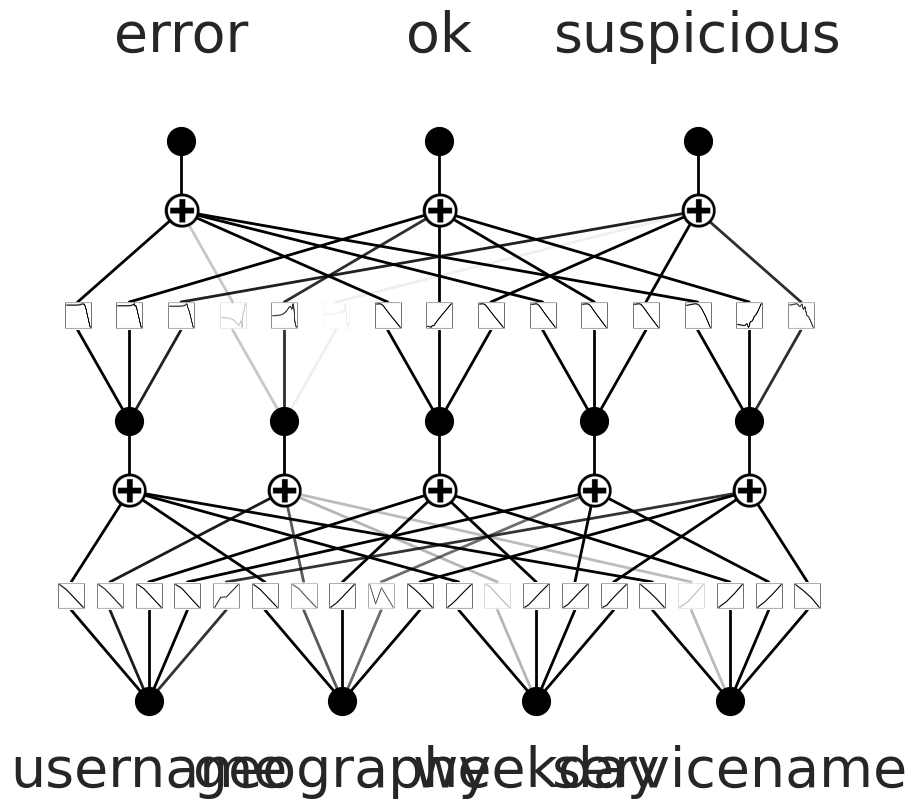

In [311]:
image_folder = 'video_img'

model = KAN(width=[4, 5, 3], grid=5, k=3, seed=0)

model(service_request_dataset['train_input'])
in_vars = feature_names
kan_target_names = service_requests['target_names']
out_vars = [kan_target_names[0],kan_target_names[1],kan_target_names[2]]
model.plot(beta=100, scale=1, in_vars=in_vars, out_vars=out_vars)

Dette blir litt rotete, så vi forenkler labels på inngang og utgang.

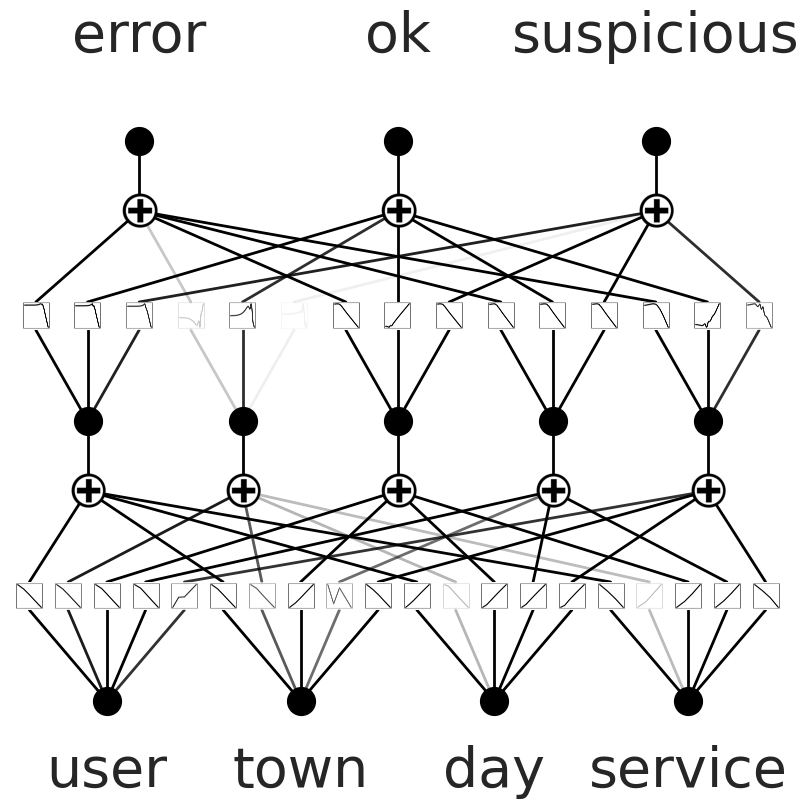

In [312]:
in_vars = ['user', 'town', 'day', 'service']
# out_vars = ['setosa', 'versi', 'virginica']
model.plot(beta=100, scale=1, in_vars=in_vars, out_vars=out_vars)

Effektivisere modellen

saving model version 0.1


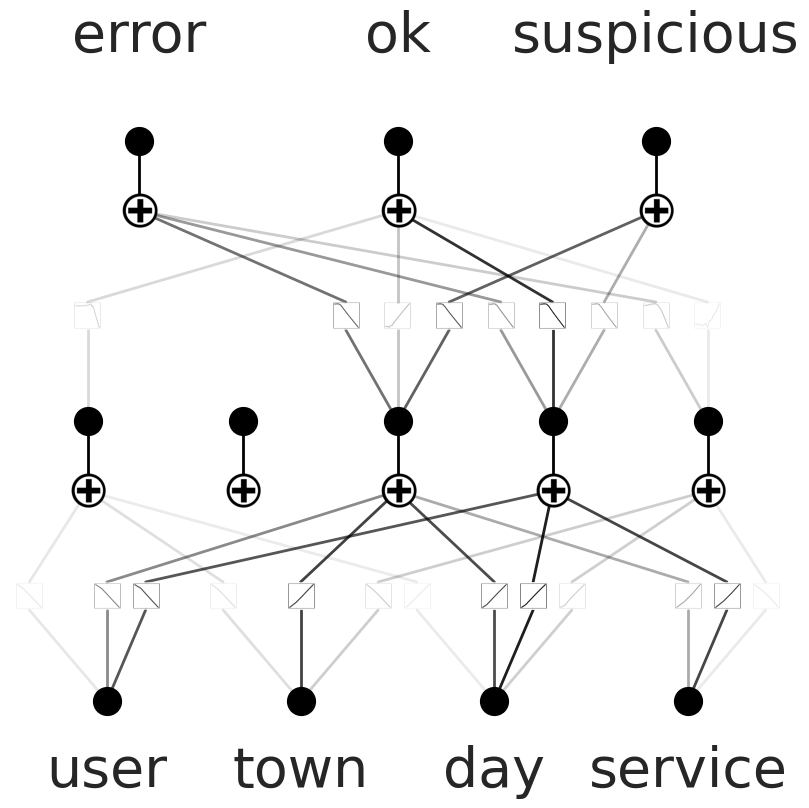

In [313]:
model = model.prune()
model(service_request_dataset['train_input'])
model.plot(scale=1, in_vars=in_vars, out_vars=out_vars)

***
# Prediksjon

In [316]:
def predict_service_request(service_request, model):
    # Konvertere den nye forespørselen til numeriske verdier ved å bruke de opprinnelige label encoders
    new_request_encoded = {}
    for column in feature_names:
        encoded_value = label_encoders[column].transform([service_request[column]])[0]
        new_request_encoded[column] = [encoded_value]

    new_request_df = pd.DataFrame(new_request_encoded)
    return predict(new_request_df, model)

# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row_tensor = torch.tensor([row], dtype=torch.float32).to(device)  # Convert list to tensor
    predict_inputs = torch.empty(0, 4, device=device)
    predict_inputs = torch.cat((predict_inputs, row_tensor), dim=0)  # Concatenate tensors
    # make prediction
    print(row)
    print(row_tensor)
    yhat = model(row_tensor)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

def prediction_result(expected, yhat):
    for target_name in iris.target_names:
        print(f"{target_name}: {yhat[0][iris.target_names.tolist().index(target_name)]}")
    print(f"Expected: {expected}")

def prediction_result_service_request(expected, yhat):
    for target_name in service_requests['target_names']:
        print(f"{target_name}: {yhat[0][service_requests['target_names'].tolist().index(target_name)]}")
    print(f"Expected: {expected}")

Lag en rad med data for en blomst, og prediker hvilken klasse blomsten tilhører.
sep-l: 6.3
sep-w: 2.7
pet-l: 4.9
pet-w:1.8
Forventet familie: virginica

In [317]:
# Ny serviceforespørsel
service_request = {
    'username': 'Ola',
    'geography': 'Oslo',
    'weekday': 'Sunday',
    'servicename': 'userreview'
}

# Gjøre prediksjon
yhat = predict_service_request(service_request, model)
prediction_result_service_request('ok', yhat)

ValueError: could not determine the shape of object type 'DataFrame'

### Virginica

In [ ]:
row = [6.3, 2.7, 4.9, 1.8]
yhat = predict(row, model)
prediction_result('virginica', yhat)

In [ ]:
row = [6.7,3.1,4.7,1.5]
yhat = predict(row, model)
prediction_result('virginica', yhat)

### Setosa

In [ ]:
row = [5.0,3.4,1.6,0.4]
yhat = predict(row, model)
prediction_result('setosa', yhat)

### Versicolor

In [ ]:
row = [5.0,2.0,3.5,1.0]
yhat = predict(row, model)
prediction_result('versicolor', yhat)